In [1]:
import babel as bl, scipy as sp, numpy as np, pandas as pd, seaborn as sns
from scipy import stats
from babel import numbers
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(pd.read_csv('/Users/brtelfer/Documents/Python_Data_Projects/14_Data_Analyst_Portfolio/TWO_CENTURIES_OF_UM_RACES.csv'))
df.head(5)

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_28800/1825276014.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.DataFrame(pd.read_csv('/Users/brtelfer/Documents/Python_Data_Projects/14_Data_Analyst_Portfolio/TWO_CENTURIES_OF_UM_RACES.csv'))


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [3]:
df_f = df[(df['Year of event'] == 2020) & (df['Event name'].str.contains('USA')) & (df['Event distance/length'].isin(['50km','50mi']))]

In [4]:
df_f['Event name'] = df_f['Event name'].map(lambda x: x.rstrip('(USA)'))

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_28800/3567398916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Event name'] = df_f['Event name'].map(lambda x: x.rstrip('(USA)'))


In [5]:
df_f['Event name']

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26524, dtype: object

In [6]:
df_f = df[(df['Year of event'] == 2020) & (df['Event name'].str.contains('USA')) & (df['Event distance/length'].isin(['50km','50mi']))]

In [7]:
df_f['Event name'] = df_f['Event name'].map(lambda x: x.rstrip('(USA)'))

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_28800/3567398916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Event name'] = df_f['Event name'].map(lambda x: x.rstrip('(USA)'))


In [8]:
# Clean up athelte page
df_f['athlete_age'] = 2020 - df_f['Athlete year of birth']

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_28800/2456706892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['athlete_age'] = 2020 - df_f['Athlete year of birth']


In [9]:
df_f['athlete_age']

2539945    29.0
2539946    39.0
2539947    21.0
2539948    37.0
2539949    43.0
           ... 
2760957    62.0
2760958    43.0
2760959    58.0
2760960    39.0
2760961    40.0
Name: athlete_age, Length: 26524, dtype: float64

In [10]:
df_f['Athlete performance'] = df_f['Athlete performance'].str.strip('h')

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_28800/2124880355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Athlete performance'] = df_f['Athlete performance'].str.strip('h')


In [11]:
df_f.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID',
       'athlete_age'],
      dtype='object')

In [12]:
#drop columns, Athelete club, athelete country, athlete year of birth, athlete age category
df_f = df_f.drop(['Athlete club','Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)

In [13]:
#clean up null values
df_f.isna().sum()
df_f[df_f['athlete_age'].isna() == 1]
df_f = df_f.dropna()

In [14]:
#check for duplicates
df_f[df_f.duplicated() == 1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [ ]:
#reset index
df_f.reset_index(drop = True)

In [17]:
# Fix types
df_f.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [18]:
df_f['athlete_age'] = df_f['athlete_age'].astype(int)
df_f['Athlete average speed'] = df_f['Athlete average speed'].astype(float)

In [19]:
df_f.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21


In [21]:
# Rename cols
df_f = df_f.rename(columns = {
                        'Year of event':'Year_Of_Event',
                        'Event dates':'Event_Dates',
                        'Event name':'Event_Name',
                        'Event distance/length':'Event_Distance/Length',
                        'Event number of finishers':'Event_Number_Of_Finishers',
                        'Athlete performance':'Athlete_Performance',
                        'Athlete gender':'Athlete_Gender',
                        'Athlete average speed':'Athlete_Average_Speed',
                        'Athlete ID':'Athlete_ID',
                        'athlete_age':'Athlete_Age'
                        })

In [ ]:
# Reordering
df_f.columns
df_f = df_f.iloc[:, [1, 2, 3, 4, 8, 6, 9, 7]]

Index(['Event_Dates', 'Event_Name', 'Event_Distance/Length',
       'Event_Number_Of_Finishers', 'Athlete_ID', 'Athlete_Gender',
       'Athlete_Age', 'Athlete_Average_Speed'],
      dtype='object')

In [25]:
df_f[(df_f['Event_Name'].str.contains('Everglades|Manasota')) & (df_f['Athlete_ID'] == 222509)]

,Event_Dates,Event_Name,Event_Distance/Length,Event_Number_Of_Finishers,Athlete_ID,Athlete_Gender,Athlete_Age,Athlete_Average_Speed
2591482,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,222509,M,23,8.634
2616900,22.02.2020,Manasota Track Club 50K,50km,36,222509,M,23,10.371


<Axes: xlabel='Event_Distance/Length', ylabel='Count'>

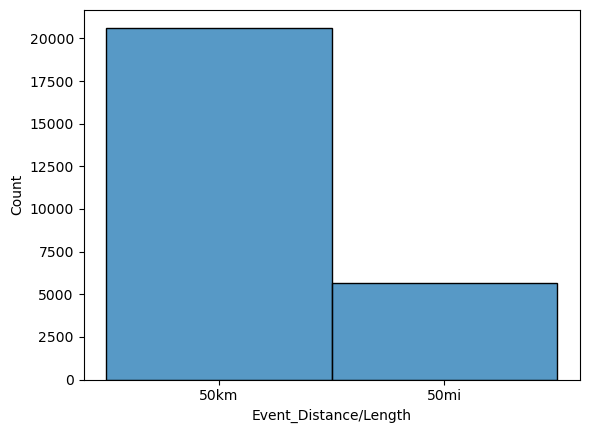

In [26]:
sns.histplot(df_f['Event_Distance/Length'])

<Axes: xlabel='Event_Distance/Length', ylabel='Count'>

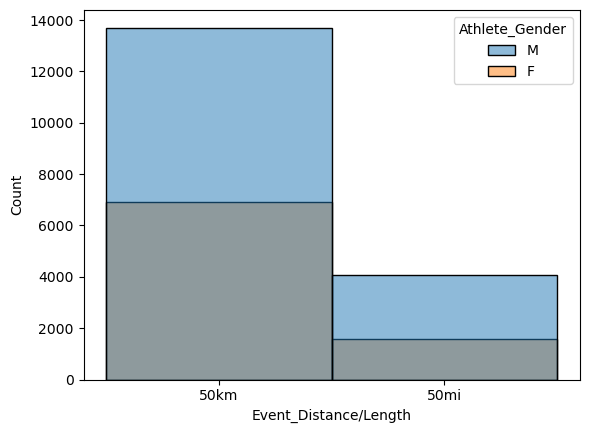

In [27]:
sns.histplot(df_f, x = 'Event_Distance/Length', hue = 'Athlete_Gender')

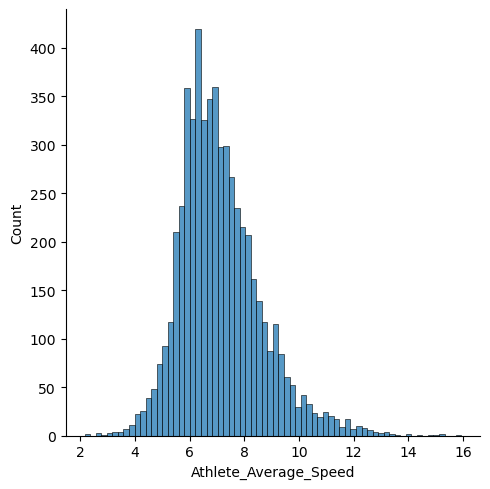

In [29]:
sns.displot(df_f[df_f['Event_Distance/Length'] == '50mi']['Athlete_Average_Speed'])

<Axes: xlabel='Event_Distance/Length', ylabel='Athlete_Average_Speed'>

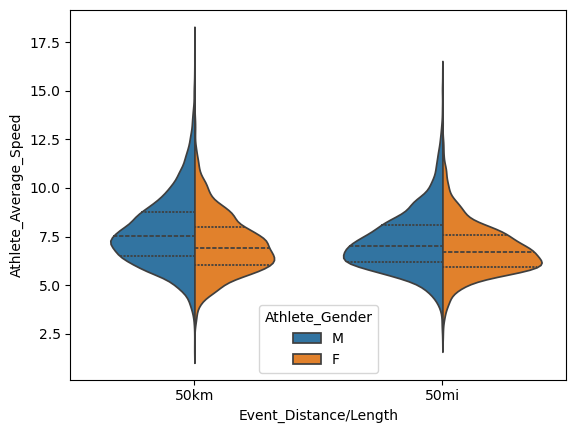

In [35]:
sns.violinplot(df_f, x='Event_Distance/Length', y='Athlete_Average_Speed', hue='Athlete_Gender', split = True, inner = 'quart')

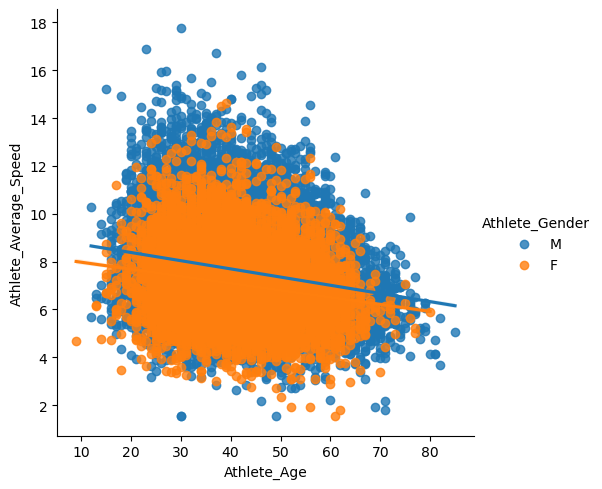

In [37]:
sns.lmplot(df_f, x= 'Athlete_Age', y='Athlete_Average_Speed', hue ='Athlete_Gender')

In [42]:
# Male female difference in speed for the 50mi vs 50k
df_f.groupby(['Event_Distance/Length', 'Athlete_Gender'])['Athlete_Average_Speed'].mean()

Event_Distance/Length  Athlete_Gender
50km                   F                 7.092015
                       M                 7.743376
50mi                   F                 6.830764
                       M                 7.249766
Name: Athlete_Average_Speed, dtype: float64

In [61]:
#What age groups are the best in the 50m race (20 + races min)
df_f[df_f['Event_Distance/Length'] == '50mi'].groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending=False).query('count>19')

,mean,count
Athlete_Age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [60]:
# What age groups are the worst in the 50m Race (20 + Races min) (show 20)
df_f[df_f['Event_Distance/Length'] == '50mi'].groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending=True).query('count>19')

,mean,count
Athlete_Age,,
60,6.227206,34
62,6.267564,39
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22
50,6.671541,172
59,6.672072,83
48,6.696853,136


In [78]:
# Seasons for the data -> Slower in the summer than winter?

#Spring 3-5
#Summer 6-8
#Fall 9-11
#Winter 12-2

df_f['Event_Months'] = df_f['Event_Dates'].str.split('.').str.get(1).astype(int)
df_f['Race_Season'] = df_f['Event_Months'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')
df_f.groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)

,mean,count
Race_Season,,
Spring,7.703542,3385
Winter,7.524506,11825
Fall,7.406619,8315
Summer,6.859274,2764


In [79]:
#50 Mile only
df_f[df['Event distance/length'] == '50mi'].groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_28800/2802921108.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f[df['Event distance/length'] == '50mi'].groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)


,mean,count
Race_Season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.046989,1981
Summer,6.486055,843
